In [1]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 02:29:23--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 02:29:23--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

P1. Distribución multivariada

a) Representa la relación edad vs. ingresos vs. plataforma en un gráfico de dispersión 3–D o de burbujas.

b) Identifica y comenta dos insights accionables.

In [10]:
import pandas as pd
import plotly.express as px
import os


cwd = os.getcwd()

file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')


df = pd.read_csv(file_path)


df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')


df_grafico = df.dropna(subset=['edad', 'ingresos', 'plataforma'])


colores_plataforma = {
    'Instagram': 'purple',
    'TikTok': 'green',
    'Facebook': 'orange'

}

fig = px.scatter_3d(df_grafico, x='edad', y='ingresos', z='plataforma',
                    color='plataforma',
                    color_discrete_map=colores_plataforma,
                    title='Relación Edad, Ingresos y Plataforma')
fig.show()

Insight 1: Según el gráfico hay un rango de edad más joven en instagram, por lo que se podría enfocar una campaña de marketing con mensajes enfocados hacía este público joven, teniendo en cuenta el grupo demográfico se puede hacer un estudio de mercado sobre las ofertas y productos que más atraen a los jovenes para tener un mayor éxito en esta plataforma.

Insight 2: Facebook tiene un rango de edad más amplio con ingresos variados, teniendo en cuenta esto las estrategias de marketing se podrían centrar en la creación de mensajes especificos enfocados en edad o ingresos y de esta manera la segmentación se enfocaría también en uno de estos grupos especificos y tendría un mejor resultado.

P2. RFM preliminar

• Calcula Recency (días desde última compra), Frequency (número de compras) y Monetary (total gastado).

• Muestra una matriz de correlaciones (heatmap) de R, F, M + recomendaciones.

• ¿Qué combinación de variables captura mejor el valor futuro del cliente? Justifica.

In [ ]:
from datetime import datetime
Hoy = datetime(2025, 4, 30)
df['Recency'] = (Hoy - pd.to_datetime(df['fecha_ultima_compra'])).dt.days
df['Frequency'] = df['compras']
df['Monetary'] = df['total_gastado']
rfm = df[['Recency', 'Frequency', 'Monetary']]
correlacion = rfm.corr()
print("\nMatriz de correlacion RFM:\n", correlacion)


Matriz de correlacion RFM:
             Recency  Frequency  Monetary
Recency    1.000000  -0.012518 -0.011812
Frequency -0.012518   1.000000  0.634117
Monetary  -0.011812   0.634117  1.000000


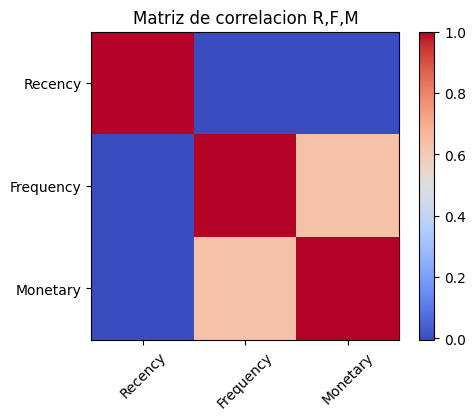

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

Hoy = datetime(2025, 4, 30)
df['Recency'] = (Hoy - pd.to_datetime(df['fecha_ultima_compra'])).dt.days
df['Frequency'] = df['compras']
df['Monetary'] = df['total_gastado']
rfm = df[['Recency', 'Frequency', 'Monetary']]
correlacion = rfm.corr()

plt.figure(figsize=(5, 4))
plt.imshow(correlacion, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=45)
plt.yticks(range(len(correlacion.index)), correlacion.index)
plt.colorbar()
plt.title('Matriz de correlacion R,F,M')
plt.show()

La matriz muestra una correlación positiva fuerte entre la frecuencia y el valor monetario, por lo que los clientes que compran con mayor frecuencia gastan mas dinero

Una alta frecuencia de compra y un gasto total alto sirven para hacer una prediccion sobre un valor futuro significativo, por lo que la frecuencia y el valor monetario ayudan a tener una visión más clara del patron de comportamiento de los cleintes a largo plazo.

P3. CAC detallado

Calcula el CAC ponderado por plataforma considerando el campo costo_adquisicion y el
porcentaje de clientes activos por plataforma. Presenta los resultados en un gráfico de
barras apiladas.

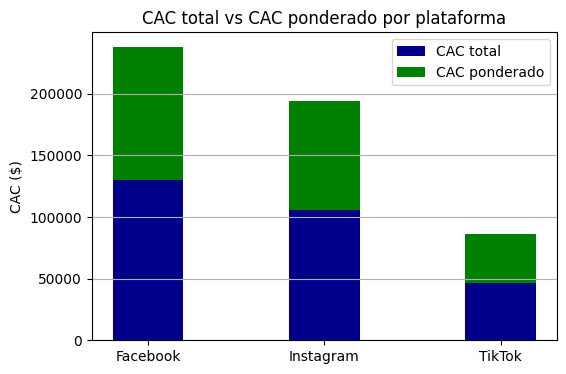

In [20]:
import numpy as np
hoy = datetime(2025, 4, 30)

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['activo'] = df['dias_desde_ultima'] <= 180
resumen = df.groupby('plataforma').agg(
    total_clientes=('id_cliente', 'count'),
    clientes_activos=('activo', 'sum'),
    cac_total=('costo_adquisicion', 'sum')
).reset_index()
resumen['porc_activos'] = resumen['clientes_activos'] / resumen['total_clientes']
resumen['CAC_ponderado'] = resumen['cac_total'] * resumen['porc_activos']
plt.figure(figsize=(6, 4))
bar_width = 0.4
x = np.arange(len(resumen))
plt.bar(x, resumen['cac_total'], width=bar_width, label='CAC total', color='darkblue')
plt.bar(x, resumen['CAC_ponderado'], width=bar_width, label='CAC ponderado', color='green', bottom=resumen['cac_total'])

plt.xticks(x, resumen['plataforma'])
plt.ylabel('CAC ($)')
plt.title('CAC total vs CAC ponderado por plataforma')
plt.legend()
plt.grid(axis='y')
plt.show()

P4. LTV proyectado

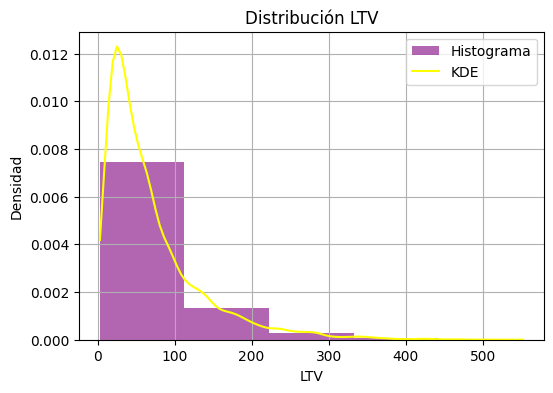

In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

df['promedio_ticket'] = df['total_gastado'] / df['compras']
df['frecuencia_mensual'] = df['compras'] / 12

def retencion(dias):
    if dias <= 90:
        return 0.80
    elif dias <= 180:
        return 0.60
    else:
        return 0.30

hoy = pd.to_datetime("2025-04-30")
df['dias_desde_ultima'] = (hoy - df['fecha_ultima_compra']).dt.days
df['tasa_retencion'] = df['dias_desde_ultima'].apply(retencion)

df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']


plt.figure(figsize=(6, 4))
counts, bins, patches = plt.hist(df['LTV'], bins=5, density=True, alpha=0.6, color='purple', label='Histograma')

kde = gaussian_kde(df['LTV'])
x_vals = np.linspace(min(df['LTV']), max(df['LTV']), 100)
plt.plot(x_vals, kde(x_vals), color='yellow', label='KDE')

plt.xlabel('LTV')
plt.ylabel('Densidad')
plt.title('Distribución LTV')
plt.legend()
plt.grid(True)
plt.show()

P5. Margen neto

<ipython-input-22-27ac3f4ec369>:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



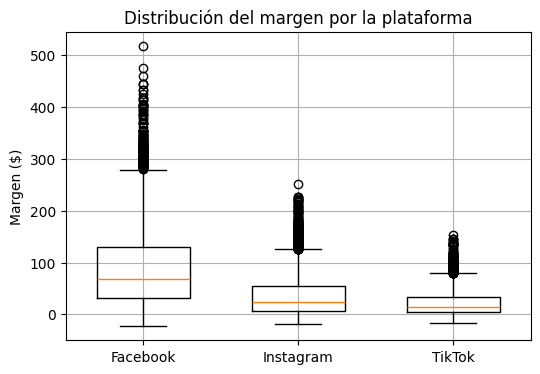

In [22]:
df['margen'] = (df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']) - df['costo_adquisicion']


plt.figure(figsize=(6, 4))
plt.boxplot([df[df['plataforma'] == plat]['margen'] for plat in df['plataforma'].unique()],
            labels=df['plataforma'].unique(), widths=0.6)

plt.ylabel('Margen ($)')
plt.title('Distribución del margen por la plataforma')
plt.grid(True)
plt.show()

Facebook es donde se obtienen las mayores ganancias y donde hay oportunidad de ampliarlo aun más, enfocar estrategias de marketing en Fcebook podría hacer que las ventas aumenten mucho más y generar un retorno mayor.

P6

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

cwd = os.getcwd()
file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')
df = pd.read_csv(file_path)

features_for_clustering = ['edad', 'ingresos', 'promedio_ticket', 'dias_desde_ultima_compra']

if 'dias_desde_ultima_compra' not in df.columns:
    df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
    df['dias_desde_ultima_compra'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days

df_clustering = df[features_for_clustering].dropna().copy()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df_clustering['cluster_id'] = kmeans.fit_predict(scaled_features)


df.loc[df_clustering.index, 'cluster_id'] = df_clustering['cluster_id']
df['cluster_id'] = df['cluster_id'].astype('Int64')


print(df['cluster_id'].value_counts().sort_index())


if len(features_for_clustering) >= 2 and len(features_for_clustering) <= 3:
    import plotly.express as px
    if len(features_for_clustering) == 2:
        fig = px.scatter(df_clustering, x=features_for_clustering[0], y=features_for_clustering[1], color='cluster_id', title=f'Clusters de Clientes (K={n_clusters})')
    elif len(features_for_clustering) == 3:
        fig = px.scatter_3d(df_clustering, x=features_for_clustering[0], y=features_for_clustering[1], z=features_for_clustering[2], color='cluster_id', title=f'Clusters de Clientes (K={n_clusters})')
    fig.show()

cluster_id
0    5223
1    5226
2    4551
Name: count, dtype: Int64


P7. Segmentación final

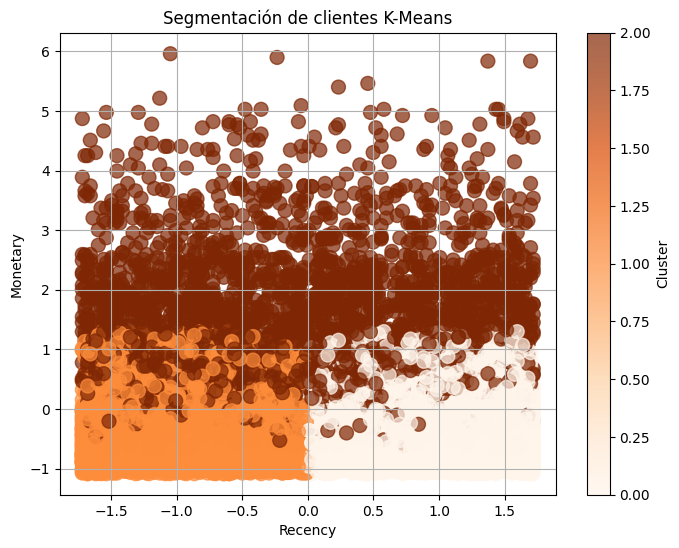

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df['dias_desde_ultima'] = (pd.to_datetime("2025-04-30") - df['fecha_ultima_compra']).dt.days
df['recency'] = df['dias_desde_ultima']
df['frequency'] = df['compras']
df['monetary'] = df['total_gastado']


scaler = StandardScaler()
df[['recency', 'frequency', 'monetary']] = scaler.fit_transform(df[['recency', 'frequency', 'monetary']])


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['recency', 'frequency', 'monetary']])


names_and_slogans = {
    0: ("Cluster 1", "Rentabilidad alta"),
    1: ("Cluster 2", "Rentabilidad media"),
    2: ("Cluster 3", "Rentabilidad baja")
}


df['cluster_name'] = df['cluster'].map(lambda x: names_and_slogans[x][0])
df['cluster_slogan'] = df['cluster'].map(lambda x: names_and_slogans[x][1])


plt.figure(figsize=(8, 6))
plt.scatter(df['recency'], df['monetary'], c=df['cluster'], cmap='Oranges', s=100, alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Segmentación de clientes K-Means')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

P8. Predicción de «High Margin»

In [ ]:
import pandas as pd


percentil_75_margen = df['margen'].quantile(0.75)

df['high_margin'] = df['margen'].apply(lambda x: 1 if x >= percentil_75_margen else 0)

print(df[['margen', 'high_margin']].head())

print("\nDistribución de la etiqueta 'high_margin':")
print(df['high_margin'].value_counts())

   margen  high_margin
0    24.4            0
1    11.0            0
2    53.6            0
3    78.6            1
4    65.2            0

Distribución de la etiqueta 'high_margin':
high_margin
0    11240
1     3760
Name: count, dtype: int64


P9. Asignación de presupuesto (US$10 000)

In [ ]:
import pandas as pd


presupuesto_total = 10000


cluster_concentrado = 0
presupuesto_escenario_i = {cluster_concentrado: presupuesto_total}
print(f"Escenario i) Presupuesto concentrado en el cluster {cluster_concentrado}: ${presupuesto_escenario_i[cluster_concentrado]:,.2f}")


clusters_clave = [1, 2]
presupuesto_por_cluster_ii = presupuesto_total / len(clusters_clave)
presupuesto_escenario_ii = {cluster: presupuesto_por_cluster_ii for cluster in clusters_clave}
print("\nEscenario ii) Presupuesto distribuido en dos clusters clave:")
for cluster, presupuesto in presupuesto_escenario_ii.items():
    print(f"Cluster {cluster}: ${presupuesto:,.2f}")






Escenario i) Presupuesto concentrado en el cluster 0: $10,000.00

Escenario ii) Presupuesto distribuido en dos clusters clave:
Cluster 1: $5,000.00
Cluster 2: $5,000.00


P10

In [24]:
import pandas as pd
import plotly.graph_objects as go
import os


cwd = os.getcwd()
file_path = os.path.join(cwd, 'clientes_segmentos (1).csv')
df = pd.read_csv(file_path)


top_10_percent_threshold = df['recomendaciones'].quantile(0.90)
top_advocates_df = df[df['recomendaciones'] >= top_10_percent_threshold].copy()

num_top_advocates = len(top_advocates_df)
print(f"Número de top 10% de advocates: {num_top_advocates}")


if 'cluster_id' not in df.columns:
    print("Advertencia: La columna 'cluster_id' no existe. Necesitas realizar un clustering primero.")

    df['cluster_id'] = 0
else:
    print("Columna 'cluster_id' encontrada.")


if 'total_gastado' not in df.columns:
    print("Advertencia: La columna 'total_gastado' no existe. Usando 'promedio_ticket' como aproximación.")
    df['total_gastado'] = df['promedio_ticket']
else:
    df['total_gastado'] = pd.to_numeric(df['total_gastado'], errors='coerce').fillna(0)

cluster_avg_value = df.groupby('cluster_id')['total_gastado'].mean().reset_index()
cluster_avg_value.rename(columns={'total_gastado': 'avg_value_per_customer'}, inplace=True)


top_advocates_df = pd.merge(top_advocates_df, df[['id_cliente', 'cluster_id']], on='id_cliente', how='left')


top_advocates_df = pd.merge(top_advocates_df, cluster_avg_value, on='cluster_id', how='left')


top_advocates_df['future_value_new_customers'] = top_advocates_df['avg_value_per_customer'] * 2


total_future_value_new_customers = top_advocates_df['future_value_new_customers'].sum()
print(f"Valor futuro total estimado de los nuevos clientes: ${total_future_value_new_customers:,.2f}")


cascade_data = pd.DataFrame({
    'etapa': ['Valor Actual de la Base de Clientes',
              f'Valor de los {num_top_advocates} Advocates (Top 10%)',
              f'Valor Futuro Estimado de {num_top_advocates * 2} Nuevos Clientes',
              'Valor Futuro Total Estimado'],
    'valor': [df['total_gastado'].sum(),
              top_advocates_df['total_gastado'].sum(),
              total_future_value_new_customers,
              df['total_gastado'].sum() + total_future_value_new_customers]
})


cascade_data['cambio'] = cascade_data['valor'].diff().fillna(cascade_data['valor'].iloc[0])
cascade_data.loc[0, 'cambio'] = 0

fig = go.Figure(go.Waterfall(
    name="Programa de Referidos - Estimación de Valor Futuro",
    orientation="v",
    x=cascade_data['etapa'],
    y=cascade_data['cambio'],
    textposition="outside",
    text=[f"${v:,.2f}" for v in cascade_data['valor']],

    totals={'marker': {"color": "yellow"}},
    measure=['absolute', 'relative', 'relative', 'total'],
))

fig.update_layout(
    title="Estimación del Valor Futuro con un Programa de Referidos",
    yaxis_title="Valor (USD)"
)
fig.show()

Número de top 10% de advocates: 5950
Advertencia: La columna 'cluster_id' no existe. Necesitas realizar un clustering primero.
Valor futuro total estimado de los nuevos clientes: $1,366,285.81


Posibles sesgos
1. Puede que los 150 clientes no hayan sido elegidos de forma aleatoria y no reflejen la realidad de todos los que usan YumFit. Si se eligieron a dedo o por ser los más activos, las conclusiones podrían estar un poco "desconectadas" del resto.

2. La info podría tener sus fallas. Se puede dar el caso de que los ingresos son lo que la gente dice y no la verdad, o la "plataforma" no cuenta si usan varias a la vez. Esto nos daría una imagen medio borrosa.

3. Solo vemos a los clientes que siguen aquí sin tener en cuenta los que ya no hacen parte de la marca. Su historia también cuenta y podría cambiar la perspectiva sobre por qué la gente deja de usar YumFit.

Mejoras metodologicas:

1. Para que los resultados valgan para todos, tocaría analizar a mucha más gente y asegurarnos de que haya de todo tipo, como en la vida real.

2. Intentar cruzar datos de varias fuentes y ver si la info cuadra. Si algo importante como los ingresos varia, buscar maneras de confirmarlo para no basar todo en comentarios.